## Error Analysis Computational Homework 4
By Aleena & Kriti

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
from tqdm import tqdm
import math 


In [2]:
N=5
T=1
h=0.5
j=0.1/N

In [3]:
def H(p,phi):
    return 0.5*p**2 + (0.5*T*phi**2)/j -(N)*np.log(2*np.cosh(h/T+phi))
def phidot(p):
    return (p)
def pdot(phi):
    return(-phi*T/j + N*np.tanh(h/T+phi))

In [4]:
def leapfrog(p,phi,n):
    epsilon=1/n ## if the length if trajectory is 1: $p^2+ phi^2=1$
    P,Phi=p,phi
    Phi=phi+epsilon*0.5*phidot(p)
    for i in range(n):
        Phi= Phi + epsilon*phidot(P)
        P=P+epsilon*pdot(Phi)
        
    Phi=Phi-0.5*epsilon*phidot(P)
    return P,Phi
    
    

In [5]:
def deltaH (p,phi,P,Phi):
    Prob= np.min([1,np.exp(H(p,phi)-H(P,Phi))])
#         print(np.exp(H(p,phi)-H(P,Phi)))
    if(Prob<1):
        #print(Prob)
        a=np.random.uniform(0,1)
        if(a<Prob):
            Prob=1
        
    if(Prob==1):
        return Prob,P,Phi
    else:
        return Prob,p,phi

In [6]:
def autocor(marr):
    
    gamma = np.zeros(50)
    mavg = np.mean(marr)
    for tau in tqdm(range(50)):
        count = 0
        for k in range(len(marr)):
        
            for l in range(len(marr)):
                
                if(abs(k-l) == tau):          
                    count+=1
                    gamma[tau] += (marr[k] - mavg)*(marr[l] - mavg)

        gamma[tau] *= 1/count
    
    Ctau = gamma/gamma[0]
    return Ctau
            

In [7]:
def binning(marr,b):
    Mavg=[]
    for i in range (0,len(marr),b):
        mavg=0
        for j in range(b):
            mavg+=marr[i+j]
        mavg=mavg/b  
        Mavg.append(mavg)
    return(Mavg)
        

In [8]:
## Bootstrap error
def bootstrap(marr,Nbs):
    means = []
    for j in range(Nbs):
        Marr = []
        for i in range(len(marr)):  
            Marr.append(np.random.choice(marr))
        means.append(np.mean(Marr))

    Me = np.mean(means)
    std = np.std(means)

    return std

In [9]:
phyarr=[]
prob_arr = []
marr=[]
phi=1.
for i in range(12800):
    p=np.random.normal(0,1)
    pf,phif=leapfrog(p,phi,100) ## leapfrog convergence is good enough for n=100
    prob,P_f,Phi_f=deltaH(p,phi,pf,phif)
    p,phi=P_f,Phi_f
    if(i>=6400):
        phyarr.append(phi)
        marr.append(np.tanh(h/T+phyarr[i-6400]))
        prob_arr.append(prob)

In [10]:
phyarr1=[]
marr1=[]
phi=1.
for i in range(12800):
    p=np.random.normal(0,1)
    pf,phif=leapfrog(p,phi,4) ## nmd is given to be 4
    prob,P_f,Phi_f=deltaH(p,phi,pf,phif)
    p,phi=P_f,Phi_f
    if(i>=6400):   ## thermalization
        phyarr1.append(phi)
        marr1.append(np.tanh(h/T+phyarr1[i-6400]))
        

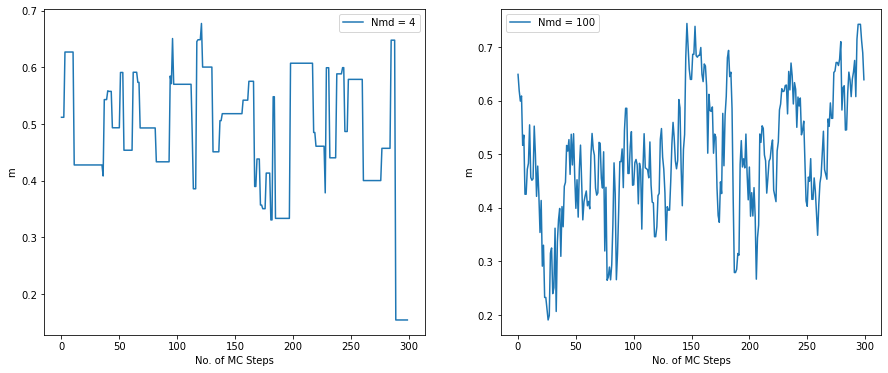

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.ylabel('m')
plt.xlabel('No. of MC Steps')
plt.plot(marr1[0:300],label = 'Nmd = 4')
plt.legend()
plt.subplot(122)
plt.ylabel('m')
plt.xlabel('No. of MC Steps')
plt.plot(marr[0:300],label = 'Nmd = 100')
#res = np.array(marr1)-np.array(marr)
#plt.plot(res[7700:],label = 'Residual')
plt.legend()

The Two trajectories are different in the sense that for $N_{md}=4$ the graph is stable i.e. we see many straight lines in the graph which indicates that many of the proposed moves are rejected by our montecarlo algorithm i.e. the system remains in the same state for multiple moves which is not the case where $N_{md}=100$ most of the moves are accepted and thats why our state changes rapidly.


In [12]:
Ctau4 = autocor(marr1)
Ctau100 = autocor(marr)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:09<00:00,  4.98s/it]


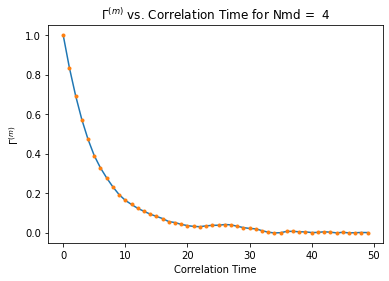

In [13]:
plt.xlabel('Correlation Time')
plt.ylabel('$\Gamma^{(m)}$')
plt.title('$\Gamma^{(m)}$ vs. Correlation Time for Nmd =  4')
plt.plot(Ctau4)
plt.plot(Ctau4,'.')

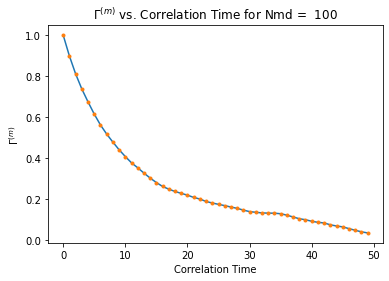

In [14]:
plt.xlabel('Correlation Time')
plt.ylabel('$\Gamma^{(m)}$')
plt.title('$\Gamma^{(m)}$ vs. Correlation Time for Nmd =  100')
plt.plot(Ctau100)
plt.plot(Ctau100,'.')

In [15]:
Cbinar=[]
Mbinar = []

for i in range(1,7):
    Mbin=binning(marr,2**i)
    Mbinar.append(Mbin)
    Cbin=autocor(Mbin)
    Cbinar.append(Cbin)

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 847.34it/s]


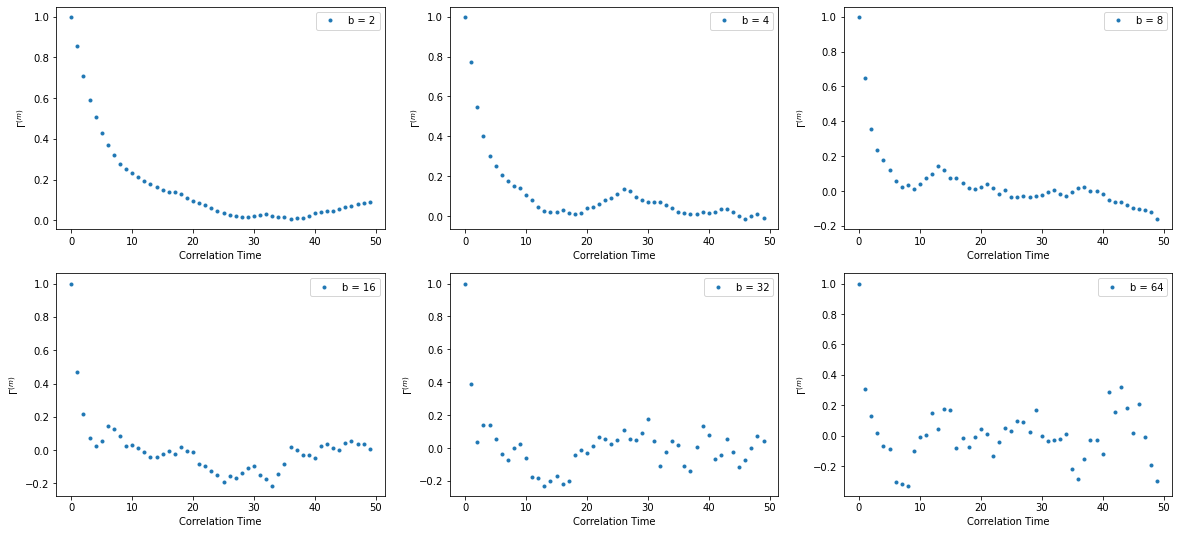

In [16]:
plt.figure(figsize = (20,9))
plt.subplot(231)
plt.xlabel('Correlation Time')
plt.ylabel('$\Gamma^{(m)}$')
plt.plot(Cbinar[0],'.',label = 'b = 2')
plt.legend()
plt.subplot(232)
plt.xlabel('Correlation Time')
plt.ylabel('$\Gamma^{(m)}$')
plt.plot(Cbinar[1],'.',label = 'b = 4')
plt.legend()
plt.subplot(233)
plt.xlabel('Correlation Time')
plt.ylabel('$\Gamma^{(m)}$')
plt.plot(Cbinar[2],'.',label = 'b = 8')
plt.legend()
plt.subplot(234)
plt.xlabel('Correlation Time')
plt.ylabel('$\Gamma^{(m)}$')
plt.plot(Cbinar[3],'.',label = 'b = 16')
plt.legend()
plt.subplot(235)
plt.xlabel('Correlation Time')
plt.ylabel('$\Gamma^{(m)}$')
plt.plot(Cbinar[4],'.',label = 'b = 32')
plt.legend()
plt.subplot(236)
plt.xlabel('Correlation Time')
plt.ylabel('$\Gamma^{(m)}$')
plt.plot(Cbinar[5],'.',label = 'b = 64')
plt.legend()

The autocorrelation between the initial consecutive points decrease as we increase the bin size similar to what we expected whereas when we keep on increasing the bin size, we see increasing fluctuation in the autocorrelation function which we didn't expect and we are not sure why that happens.  

In [17]:
sigmaar = []
barr = []
for i in range(6):
    barr.append(2**(i+1))
    Mbinar[i] = np.array(Mbinar[i])
    sigmaar.append(np.std(Mbinar[i]))
    


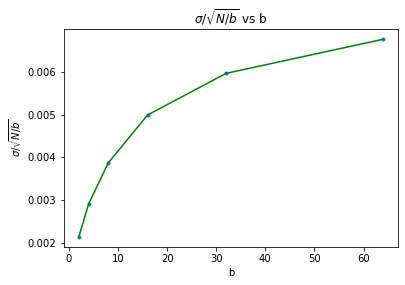

In [22]:
sigmaar = np.array(sigmaar)
plt.xlabel('b')
plt.ylabel('$\sigma/\sqrt{N/b}$')
plt.title('$\sigma/\sqrt{N/b}$ vs b')
plt.plot(barr,sigmaar/np.sqrt(6400/np.array(barr)),'.')
plt.plot(barr,sigmaar/np.sqrt(6400/np.array(barr)),color = 'green')

In [19]:
stdarr = []
Nbsarr = []

for i in tqdm(range(50,2000,20)):
    Nbsarr.append(i)
    stdarr.append(bootstrap(Mbinar[2],i))
    

100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [05:03<00:00,  3.09s/it]


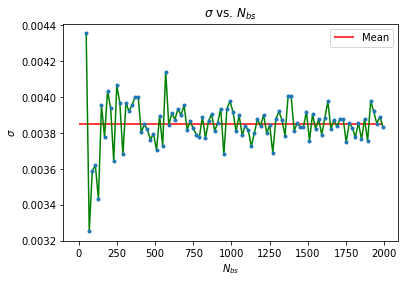

In [20]:
plt.plot(Nbsarr,stdarr,color = 'green')
plt.plot(Nbsarr,stdarr,'.')
plt.xlabel('$N_{bs}$')
plt.ylabel('$\sigma$')
plt.title('$\sigma$ vs. $N_{bs}$')
plt.hlines(np.mean(stdarr),xmin=0,xmax = Nbsarr[-1],color = 'r',label = 'Mean')
plt.legend()

In [21]:
print('Stable Value of the Error =  ',np.mean(stdarr))
print('Naive Standard Error =  ',sigmaar[2]/np.sqrt(6400/np.array(barr[2])))

Stable Value of the Error =   0.003849751340526135
Naive Standard Error =   0.003870652146633497


The stable value of the bootstrap error agrees very well with the Naive standard error that we computed for b = 8 earlier. 